In [4]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#create dataframe to read data 
df = pd.read_csv('DA-Data-Analyst-interview-assignment-Data.csv')

In [6]:
#For  number of rows and column in given dataset
df.shape

(30000, 11)

In [7]:
#the data for 5 records from dataframe
df.sample(5)


,Uniq Id,Crawl Timestamp,Job Title,Job Salary,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
29956,8fa581365a0c30c2bc330d2a11b85604,2019-07-06 19:37:04 +0000,crm Developers,Not Disclosed by Recruiter,1 - 3 yrs,Developer| Real estate| CRM| Advertising| Eng...,Programming & Design,"Bengaluru,bangalore","IT Software - Application Programming , Mainte...","Real Estate, Property",Software Developer
27596,b58590dcca5924ce5f76eb42594cd232,2019-08-04 10:17:33 +0000,Hiring For Wealth Relationship Manager For Le...,"3,00,000 - 8,00,000 PA.",1 - 6 yrs,WEALTH MANAGEMENT| FINANCIAL PLANNER| FINANCI...,Investment Banking,"Ahmedabad,Mumbai,Pune","Financial Services , Banking , Investments , I...","Banking, Financial Services, Broking",Wealth Manager
11513,be10a1f944551dcb24d2f5f4a4ed095d,2019-07-04 12:32:18 +0000,"Key Account Manager (sales & Relationship), H...","2,50,000 - 5,00,000 PA.",1 - 6 yrs,marketing| client acquisition| key account ma...,Corporate Sales,Hyderabad,"Sales , Retail , Business Development","Medical, Healthcare, Hospitals",Sales/Business Development Manager
14452,5ded40dfe281a1d3ab4f3a4dae93f212,2019-08-06 05:29:40 +0000,Informatica MDM,Not Disclosed by Recruiter,3 - 7 yrs,Informatica| Troubleshooting| Automotive| Ora...,Programming & Design,Bengaluru,"IT Software - DBA , Datawarehousing","IT-Software, Software Services",Software Developer
14909,f9b21a763f0158a317321213b42aa027,2019-08-05 13:59:17 +0000,Finance Officer - R&D Vertical,Not Disclosed by Recruiter,1 - 6 yrs,Change management| GRN| External audit| Physi...,Finance/Audit,Noida,"Accounts , Finance , Tax , Company Secretary ,...","Advertising, PR, MR, Event Management",Finance Executive


In [8]:
#let us check the dataframe structure and its column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Uniq Id                  30000 non-null  object
 1   Crawl Timestamp          30000 non-null  object
 2   Job Title                29425 non-null  object
 3   Job Salary               29950 non-null  object
 4   Job Experience Required  29427 non-null  object
 5   Key Skills               28729 non-null  object
 6   Role Category            27695 non-null  object
 7   Location                 29423 non-null  object
 8   Functional Area          29427 non-null  object
 9   Industry                 29427 non-null  object
 10  Role                     29099 non-null  object
dtypes: object(11)
memory usage: 2.5+ MB


Features of Dataset

  1)Uniq Id | object| unique identification
  2)Crawl Timestamp | object | when job information was created
  3)Job Title | object | the level of the job
  4)Job Salary |object | job salaries by company
  5)Job Experience Required |object | Experience required to apply the job
  6)Key Skills| object |  key skill required for job
  7)Role Category| object | Role Category
  8)Location| object |job location
  9)Functional Area| object | functional role for job 
  10)Industry |object | type of industry
  11)Role | object | type of role

In [9]:
# Total Number of NaN values in each column
df.isnull().sum()

Uniq Id                       0
Crawl Timestamp               0
Job Title                   575
Job Salary                   50
Job Experience Required     573
Key Skills                 1271
Role Category              2305
Location                    577
Functional Area             573
Industry                    573
Role                        901
dtype: int64

In [10]:
# check what will be new shape after droping missing values
df.dropna(inplace=False).shape

(27005, 11)

There are some missing values found in job title, job salary and in other features, specially Role Category feautre has max 2305 missing values. the number of missing values in each feature are not much. even if we drop all missing value still we will have good amount data to analyse. let us drop all missing values permanently.

In [11]:
#drop missing values
df.dropna(inplace=True)

In [12]:
#check shape
df.shape

(27005, 11)

Find Features with One Value


In [13]:
for column in df.columns:
    print(column,df[column].nunique())

Uniq Id 27005
Crawl Timestamp 26061
Job Title 21849
Job Salary 1038
Job Experience Required 247
Key Skills 25287
Role Category 204
Location 2428
Functional Area 69
Industry 122
Role 629


 No feature has only one value

#   Explore the Categorical Features

let us try to explore the all important categorical features or columns

In [14]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['Uniq Id','Crawl Timestamp']))]
categorical_features

['Job Title',
 'Job Salary',
 'Job Experience Required',
 'Key Skills',
 'Role Category',
 'Location',
 'Functional Area',
 'Industry',
 'Role']

In [15]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Job Title and number of categories are 21849
The feature is Job Salary and number of categories are 1038
The feature is Job Experience Required and number of categories are 247
The feature is Key Skills and number of categories are 25287
The feature is Role Category and number of categories are 204
The feature is Location and number of categories are 2428
The feature is Functional Area and number of categories are 69
The feature is Industry and number of categories are 122
The feature is Role and number of categories are 629


there are 9 categorical features
all features seems to be have very high number categorical values. let us understand these features one by one
job title feature analysis can be ignored as it has high count around 22k uniq values and also same information can be found by anyzing the role feature

#  Find Categorical Feature Distribution

let us understand these categorical features one by one

Location

In [16]:
df.groupby('Location',sort=True)['Location'].count()[0:30]


Location
 Ahmedabad                                                                                         7
 Ahmedabad, Ankleshwar, Bharuch, Daman & Diu, Gandhidham, Gandhinagar, Rajkot, Vapi, Vadodara      1
 Ahmedabad, Mumbai, Vadodara                                                                       1
 Bengaluru                                                                                       229
 Bengaluru, Chennai                                                                                2
 Bengaluru, Chennai, Hyderabad                                                                     2
 Bengaluru, Chennai, Hyderabad, Mysore                                                             1
 Bengaluru, Chennai, Hyderabad, Pune                                                               3
 Bengaluru, Chennai, Hyderabad, Pune, Kolkata                                                      4
 Bengaluru, Chennai, Mysore                                                       

Location column has multiple locatios separated by comm (,). let us separate all these location into individual rows, so that it will easy to analyse its count based on job opportunities

In [17]:
def get_location(df):
    df_new=pd.DataFrame()
    for index, row in df.iterrows():
        for loc in row['Location'].split(','):
            loc_df = pd.DataFrame([loc])
            df_new = pd.concat([df_new,loc_df],ignore_index=True)
    return df_new 

let us create new dataframe to hold these location splits

In [18]:
Location_df = get_location(df)
Location_df.columns = ['Location']

In [19]:
Location_df.groupby('Location',sort=True)['Location'].count().sort_values(ascending=False)[0:30]

Location
Bengaluru         5913
Mumbai            4435
Pune              3060
Hyderabad         2802
Gurgaon           2578
Chennai           2300
Noida             1723
Delhi NCR         1629
Delhi             1613
Kolkata           1610
Ahmedabad         1378
Navi Mumbai        493
Chandigarh         488
Mumbai Suburbs     318
 Bengaluru         262
Faridabad          215
Thane              209
Ghaziabad          186
 Hyderabad         176
Greater Noida      163
Coimbatore         114
Vadodara           101
 Pune              100
 Mumbai             99
Jaipur              98
haryana             91
 Gurgaon            87
 Chennai            80
Lucknow             78
Nagpur              77
Name: Location, dtype: int64

there are same location with different name, let us group these location

In [20]:
from re import search
def get_comman_location(x):
    x = x.replace(",", " /")
    if (search('bengaluru', x.lower()) or search('bangalore', x.lower())):
        return 'Bengaluru'
    elif (search('ahmedabad', x.lower())):
        return 'Ahmedabad'
    elif (search('chennai', x.lower())):
        return 'Chennai'
    elif (search('coimbatore', x.lower())):
        return 'Coimbatore'
    elif (search('delhi', x.lower()) or search('noida', x.lower()) or search('gurgaon', x.lower())):
        return 'Delhi NCR'
    elif (search('hyderabad', x.lower())):
        return 'Hyderabad'
    elif (search('kolkata', x.lower())):
        return 'Kolkata'
    elif (search('mumbai', x.lower())):
        return 'Mumbai'
    elif (search('Pune', x.lower())):
        return 'pune'
    elif (search('other', x.lower())):
        return 'Others'
    else:
        return x.strip()

let us apply above custom method on location column and create new column that is New_Location. and finaly get the location level count

In [21]:
Location_df['New_Location']=Location_df['Location'].apply(get_comman_location)

In [22]:
Location_df.groupby('New_Location',sort=True)['New_Location'].count().sort_values(ascending=False)[0:15]

New_Location
Delhi NCR     8318
Bengaluru     6457
Mumbai        5508
Pune          3160
Hyderabad     3102
Chennai       2399
Kolkata       1672
Ahmedabad     1438
Chandigarh     498
Faridabad      218
Thane          213
Ghaziabad      186
Coimbatore     122
Vadodara       104
Jaipur          98
Name: New_Location, dtype: int64

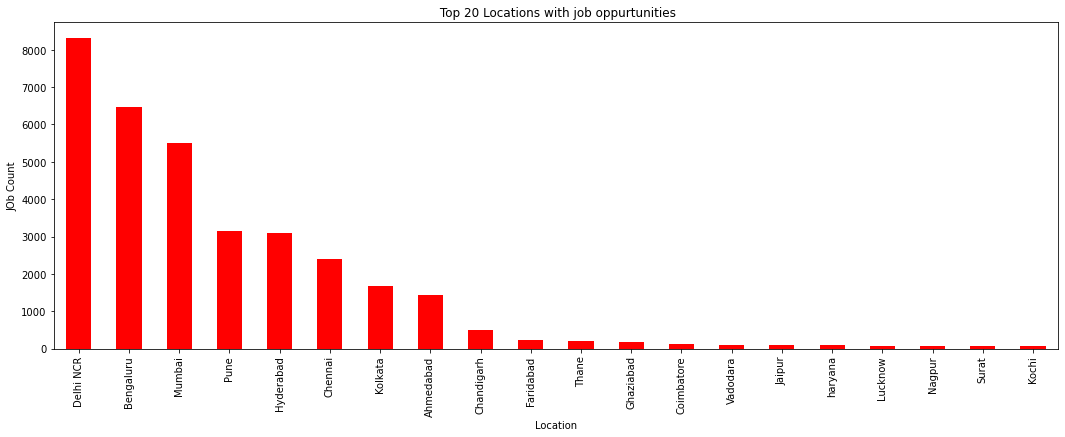

In [23]:
plt.figure(figsize=(18,6), facecolor='white')
Location_df.groupby('New_Location',sort=True)['New_Location'].count().sort_values(ascending=False)[0:20].plot.bar(color="red")
plt.xlabel('Location')
plt.ylabel('JOb Count')
plt.title(' Top 20 Locations with job oppurtunities')
plt.show()

we can see from the barplot above, the location such as Delhi NCR are the maximum followed by Bengaluru and then by Mumbai.




# Industry





In [24]:
df.groupby('Industry',sort=True)['Industry'].count()[0:15]

Industry
* A US based $4.0 billion world leader in staffing services to over 6000 customers globally. * World's largest "Technology" staffing company in the world today - IT, Telecom, Infrastructure and Engineering. * TEKsystems is a part of Allegis Group which is a $16.0 Billion US based privately held firm. One of the world's largest privately held companies (source: Forbes) * The 6th Largest staffing company in the world and the 2nd Largest in the US. * One of the top vendors to 90% of Fortune 500 companies. * Every year we deploy over 80,000 employees across different parts of the world. * Operations in North America, Europe and Asia with over 300 offices across locations. * In India, TEKsystems currently has 1000+ technical consultants employed at various Fortune 500 companies across the country. * For the second consecutive year, TEKsystems was named to Fortune magazine's "100 Best Companies to Work For" in 2014. * Please visit - www.teksystems.com ; www.allegisgroup.com, for mor

Industry column has uncleaned data, let us clean this before analysing. let us group similary industries into generic one

In [25]:
from re import search

def get_comman_job_industry(x):
    x = x.replace(",", " /")
    if (search('it-software', x.lower())):
        return 'Software Services'
    elif (search('call ', x.lower())):
        return 'Call Centre'
    elif (search('banking', x.lower()) or search('insurance', x.lower()) or search('finance', x.lower())):
        return 'Financial Services'
    elif (search('recruitment', x.lower())): 
        return 'Recruitment'
    elif (search('pharma', x.lower())): 
        return 'Pharma'
    elif (search('isp', x.lower())): 
        return 'Telcom / ISP'
    elif (search('ecommerce', x.lower())): 
        return 'Ecommerce'
    elif (search('fmcg', x.lower())): 
        return 'FMCG'
    elif (search('ngo', x.lower())): 
        return 'NGO'
    elif (search('medical', x.lower())): 
        return 'Medical'
    elif (search('aviation', x.lower())): 
        return 'Aviation'
    elif (search('fresher ', x.lower())): 
        return 'Fresher'
    elif (search('education', x.lower())): 
        return 'Education'
    elif (search('construction', x.lower())): 
        return 'Construction'
    elif (search('consulting', x.lower())): 
        return 'Consulting'
    elif (search('automobile', x.lower())): 
        return 'Automobile'
    elif (search('travel', x.lower())): 
        return 'Travels'
    elif (search('advertising', x.lower()) or search('broadcasting', x.lower())): 
        return 'Advertising'
    elif (search('transportation', x.lower())): 
        return 'Transportation'
    elif (search('agriculture', x.lower())): 
        return 'Agriculture'
    elif (search('agriculture', x.lower())): 
        return 'Agriculture'
    elif (search('industrial', x.lower())): 
        return 'Industrial Products'
    elif (search('media', x.lower())): 
        return 'Entertainment'
    elif (search('teksystems', x.lower()) or search('allegis', x.lower()) or search('aston', x.lower())
         or search('solugenix', x.lower()) or search('laurus', x.lower()) ):
        return 'Other'
    else:
        return x.strip()

In [26]:
df['New_Industry']=df['Industry'].apply(get_comman_job_industry)
df.groupby('New_Industry',sort=True)['New_Industry'].count().sort_values(ascending=False)[0:15]

New_Industry
Software Services      10458
Recruitment             2522
Financial Services      2301
Call Centre             1844
Education               1095
Medical                  623
Ecommerce                563
Construction             513
Pharma                   490
Consulting               486
Travels                  480
Automobile               476
Entertainment            432
Industrial Products      417
Advertising              390
Name: New_Industry, dtype: int64

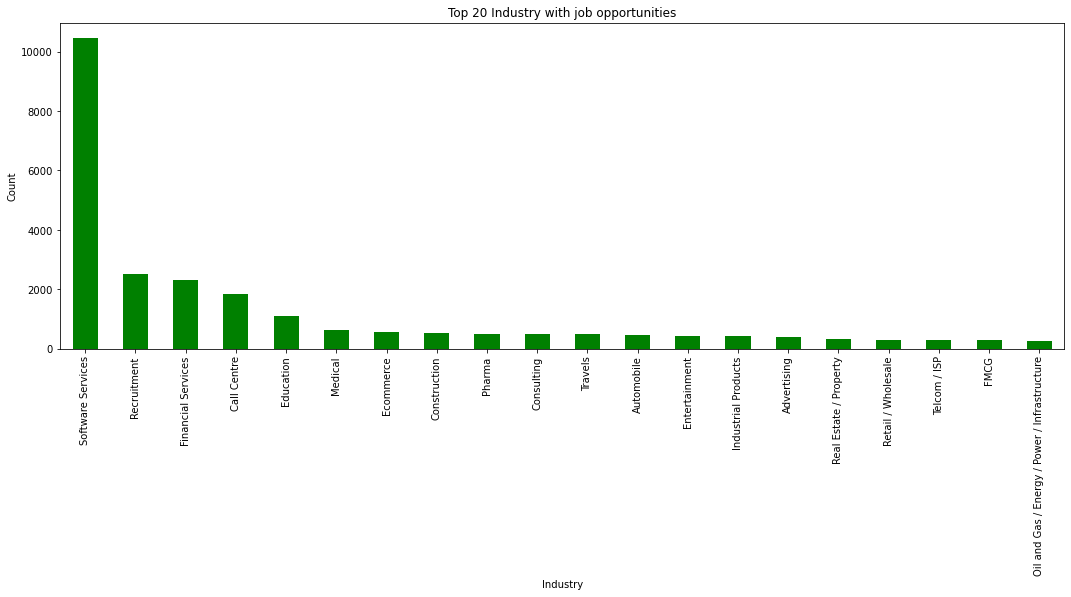

In [27]:
plt.figure(figsize=(18,6), facecolor='white')
df.groupby('New_Industry',sort=True)['New_Industry'].count().sort_values(ascending=False)[0:20].plot.bar(color='green')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('Top 20 Industry with job opportunities')
plt.show()

we can see from the barplot above, the industry as Software Services are the maximum followed by Recruitment and then by Financial Services.

# Functional Area

In [28]:
df.groupby('Functional Area',sort=True)['Functional Area'].count()[0:20]

Functional Area
* A US based $4.0 billion world leader in staffing services to over 6000 customers globally. * World's largest "Technology" staffing company in the world today - IT, Telecom, Infrastructure and Engineering. * TEKsystems is a part of Allegis Group which is a $16.0 Billion US based privately held firm. One of the world's largest privately held companies (source: Forbes) * The 6th Largest staffing company in the world and the 2nd Largest in the US. * One of the top vendors to 90% of Fortune 500 companies. * Every year we deploy over 80,000 employees across different parts of the world. * Operations in North America, Europe and Asia with over 300 offices across locations. * In India, TEKsystems currently has 1000+ technical consultants employed at various Fortune 500 companies across the country. * For the second consecutive year, TEKsystems was named to Fortune magazine's "100 Best Companies to Work For" in 2014. * Please visit - www.teksystems.com ; www.allegisgroup.com, 

functional area column also has uncleaned data, let us clean this before analysing. let us group similary functional area into generic one and update unkown description to others

In [29]:
from re import search

def get_comman_func_area(x):
    x = x.replace(",", " /")
    if (search('beauty', x.lower())):
        return 'Beauty / Fitness'
    elif (search('teaching', x.lower())):
        return 'Teaching  / Education'
    elif (search('other', x.lower())):
        return 'Others'
    elif (search('teksystems', x.lower()) or search('allegis', x.lower()) or search('aston', x.lower())
         or search('solugenix', x.lower()) or search('laurus', x.lower()) ):
        return 'Other'
    else:
        return x.strip()

let us apply above custom method on functional area column and create new column that is New_Functional_Area. and finaly get the New_Functional_Area level count and sort in desc order

In [30]:
df['New_Functional_Area']=df['Functional Area'].apply(get_comman_func_area)
df.groupby('New_Functional_Area',sort=True)['New_Functional_Area'].count().sort_values(ascending=False)[0:15]

New_Functional_Area
IT Software - Application Programming  / Maintenance                7230
Sales  / Retail  / Business Development                             3985
ITES  / BPO  / KPO  / LPO  / Customer Service  / Operations         3121
HR  / Recruitment  / Administration  / IR                           1360
Accounts  / Finance  / Tax  / Company Secretary  / Audit            1333
Marketing  / Advertising  / MR  / PR  / Media Planning               894
Financial Services  / Banking  / Investments  / Insurance            701
Production  / Manufacturing  / Maintenance                           690
Teaching  / Education                                                690
Medical  / Healthcare  / R&D  / Pharmaceuticals  / Biotechnology     577
Others                                                               506
Engineering Design  / R&D                                            463
IT Software - ERP  / CRM                                             460
IT Software - QA & Testing     

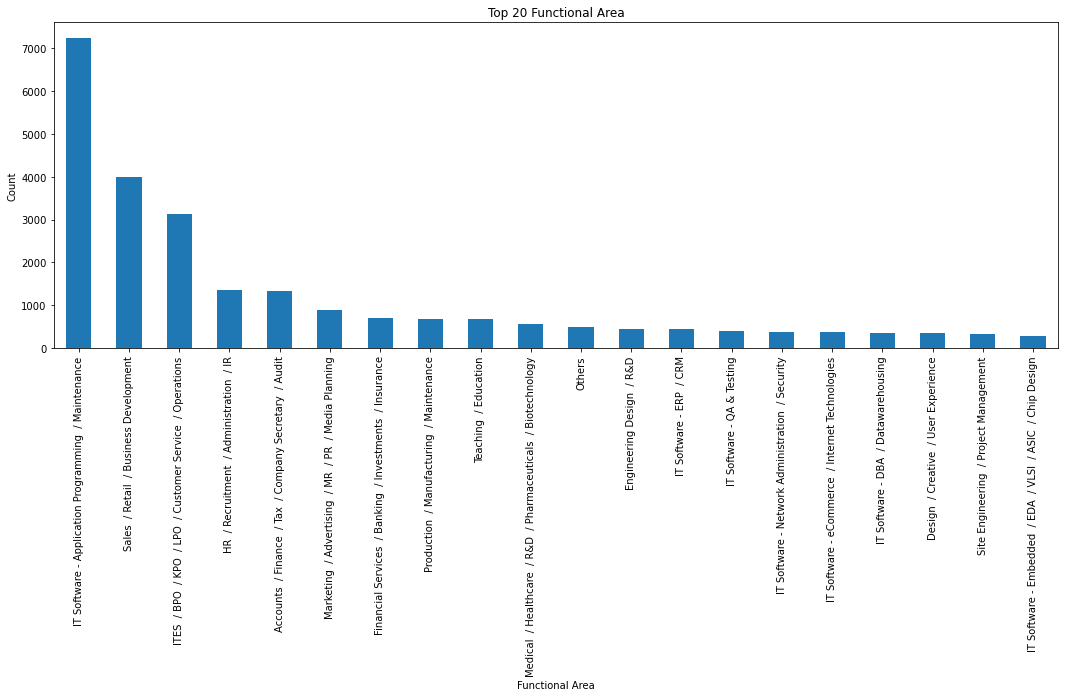

In [31]:
plt.figure(figsize=(18,6), facecolor='white')
df.groupby('New_Functional_Area',sort=True)['New_Functional_Area'].count().sort_values(ascending=False)[0:20].plot.bar()
plt.xlabel('Functional Area')
plt.ylabel('Count')
plt.title('Top 20 Functional Area')
plt.show()

Here, I have plotted Top 20 Functional Area for which Job opening is there. And, for no surprise we can see IT software - Application Programming, Maintenance is the top Functional Area having most Jobs Posted for it. As, I have already told the world is moving towards becoming digital and Artificial Intelligence, we need more Programmers and Developers in the IT sector for developing and maintaining new softwares, technologies and making machines learn on its own

# Role

In [32]:
df.groupby('Role',sort=True)['Role'].count().sort_values(ascending=False)[0:15]

Role
Software Developer                            6250
Associate/Senior Associate -(NonTechnical)    1690
Sales/Business Development Manager            1530
Sales Executive/Officer                       1152
Team Lead/Technical Lead                       833
Associate/Senior Associate -(Technical)        503
Accounts Executive/Accountant                  499
Recruitment Executive                          416
Testing Engineer                               402
Fresher                                        374
Technical Architect                            355
System Administrator                           314
HR Executive                                   289
Business Analyst                               264
Telecalling/Telemarketing Executive            224
Name: Role, dtype: int64

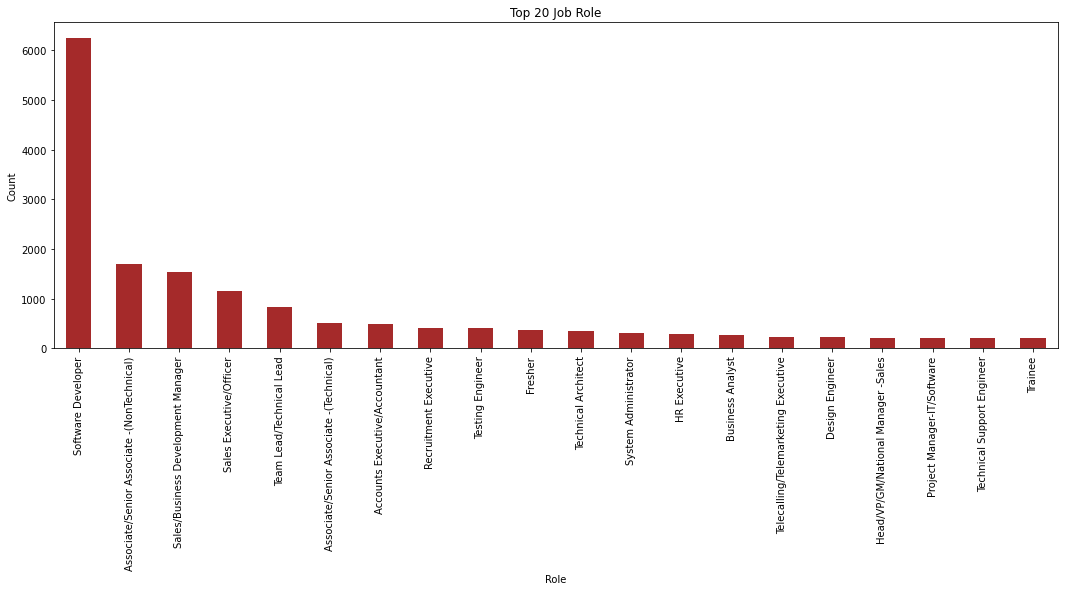

In [33]:
plt.figure(figsize=(18,6), facecolor='white')
df.groupby('Role',sort=True)['Role'].count().sort_values(ascending=False)[0:20].plot.bar(color="brown")
plt.xlabel('Role')
plt.ylabel('Count')
plt.title('Top 20 Job Role')
plt.show()

 We can see from the barplot above, the role such as software devloper are the maximum followed by Non Tech and then by sales.

# Key Skills

In [34]:
df.groupby('Key Skills',sort=True)['Key Skills'].count()[0:30]

Key Skills
 & centOS| Redhat| server| virtualization| Switches| linux| Router| Vmware| applications| hardware                             1
 .NET Architect| CSS| Cloud| Microsoft Azure| HTML| BootStrap| JQuery| CTO                                                     1
 .NET| HTML| Python| assembly language| JavaScript| Oracle| SQL                                                                1
 .NET| HTML| Python| assembly language| JavaScript| design| Oracle| SQL                                                        1
 .NET| HTML| Python| assembly language| JavaScript| developer| it| Oracle| SQL                                                 1
 .NET| HTML| Python| assembly language| JavaScript| mobile| Oracle| SQL                                                        1
 .Net                                                                                                                          2
 .Net Architect| solution architect| .Net| MVC| technical architect                   

key skill are sperated by pipeline (|), let us split and arrange the skills in group

In [35]:
def get_skills(df):
    df_new=pd.DataFrame()
    for index, row in df.iterrows():
        for skill in row['Key Skills'].split('|'):
            skill_df = pd.DataFrame([skill])
            df_new = pd.concat([df_new,skill_df],ignore_index=True)
    return df_new    

In [36]:
key_skill_df = get_skills(df)
key_skill_df.columns = ['key_skills']

In [37]:
key_skill_df.groupby('key_skills',sort=True)['key_skills'].count().sort_values(ascending=False)[0:20]

key_skills
 Javascript              1355
 HTML                    1236
 SQL                     1228
 Sales                   1190
 Python                   979
 Management               829
 Recruitment              784
 Business Executive       776
 MySQL                    727
 Monitoring               654
 Java                     648
 Technical support        646
 design                   630
 development              620
 Linux                    606
 Analytical               605
 Business Development     598
 C                        585
 Computer science         581
 jQuery                   576
Name: key_skills, dtype: int64

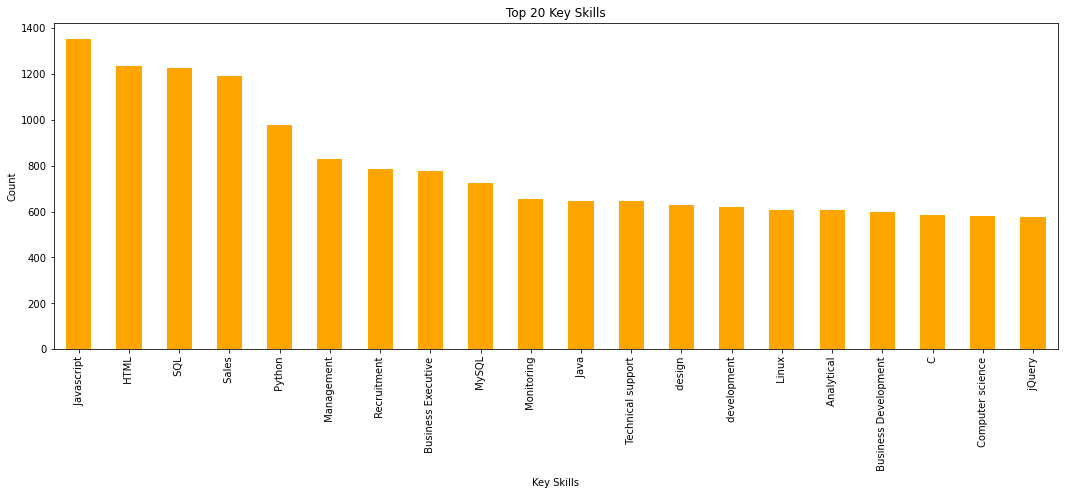

In [38]:
plt.figure(figsize=(18,6), facecolor='white')
key_skill_df.groupby('key_skills',sort=True)['key_skills'].count().sort_values(ascending=False)[0:20].plot.bar(color="orange")
plt.xlabel('Key Skills')
plt.ylabel('Count')
plt.title('Top 20 Key Skills')
plt.show()

As per above bar plot, it is clearly visible that some of the top skills are Javascript, HTML, SQL, Sales and Python

# Job Salary

In [42]:
df.groupby('Job Salary',sort=True)['Job Salary'].count()[0:30]

Job Salary
 "best In Industry"                                                                                                                                                                                                                                              4
 * Annual Paid Leaves for 30-45 days * Tax Free Salary * Annual increments. * Bonus on basis of performance. * Contract renewal option. * Weekly off ( Friday and Saturday). * 8 hours working in a                                                              1
 * annual Paid Leaves for 30-45 days * tax Free Salary * annual increments. * bonus on basis of performance. * contract renewal option. * weekly off (friday and Saturday). * 8 hours working in a days * 4 To and fro (round trip) airline tickets per con      2
 * â‚¹2 lacs/year professional development budget for conferences, books, certifications etc. * superior Medical coverage for you and your immediate family. * flexible work from home policy.                      

It is very uncleaned data, let us try to clean this and add generic salary label as per exp level and analyse

0-2 : Freshers : 0-3L
2-5 : Intermediate : 3-8L
5-8 : Lead : 8 -15L
8-12 : Manager : 15 - 22L
12-16 : Senior Manager : 22 - 30L
16-20 : Executive : 30 - 38L
20-above : Senior Executive : 38L - above

In [43]:
import re
def get_salary(x):
    if re.findall('-',x):
        lst =x.replace('PA.','').replace(',','').replace('INR','').strip().split('-')        
        try:
            sal1 = int(lst[0].strip())
            sal2 = int(lst[1].strip())
            #print (sal1)
            if (sal1 <= 300000):
                return '0-3L PA'
            elif (sal1 >= 300000 & sal2 <= 800000 ):
                return '3-8L PA'
            elif (sal1 >= 800000 & sal2 <= 1500000 ):
                return '8 -15L PA'
            elif (sal1 >= 1500000 & sal2 <= 2200000 ):
                return '15 - 22L PA'
            elif (sal1 >= 2200000 & sal2 <= 3000000 ):
                return '22 - 30L PA'
            elif (sal1 >= 3000000 & sal2 <= 3800000 ):
                return '30 - 38L PA'
            if (sal1 >= 3800000):
                return '38L - Above PA'
        except:
            return('Others')
    else:
        return('Others')

let us apply above custom method on Job Salary column and create new column that is New_Job_Salary. and finaly get the Job Salary level count

In [44]:
df['New_Job_Salary']=df['Job Salary'].apply(get_salary)

In [45]:
df.groupby('New_Job_Salary',sort=True)['New_Job_Salary'].count().sort_values(ascending=False)[0:30]

New_Job_Salary
Others     20194
0-3L PA     4180
3-8L PA     2631
Name: New_Job_Salary, dtype: int64

It seems for most of the job openings, no job salary is mentioned.

# Conclusion

* Given dataset has 30000 rows and 11 columns

* Uniq Id and Crawl Timestamp columns are seems to be not usefull

* There are some missing values found in job title, job salary and in other features, specially Role Category feautre has max 2305 missing values. the number of missing values in each feature are not much. even if we drop all missing value still we will have good amount data to analyse

* There are 9 categorical features for which we tried to anyze

* All features seems to be have very high number of categorical values.

* Job title feature analysis can be ignored as it has high count around 22k unique values and also same information can be found by anyzing the role and its categoty features

* Industry, Functional Area and few other columns have uncleaned data and after cleaning the data we found that Industry as Software Services are the maximum followed by Recruitment and then by Financial Services.  
* Functional Area such as IT Software - Application Programming are the maximum followed by Sales and then by BPO/KPO.
* Location column has multiple locatios separated by comm (,), after separated these we found that the location such as Delhi NCR are the maximum followed by Bengaluru and then by Mumbai

* Role category such as Programming & Design are the maximum followed by voice and then by retail sales.
* Most job posting required intermediate level experience professionals that is about 2-5 years exp holders followed by Lead Exp (5-8 Years) and then Freshers (0-2 Years).
* it seems for most of the job openings, no job salary is mentioned and hence we could not find any insight from this.

* Key skill are sperated by pipeline (|), After separated these we found that some of the top skills are Javascript, HTML, SQL, Sales and Python